In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize, StandardScaler




In [43]:
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True, fmt='d',cmap='Blues', xticklabels=classes,yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta predicha')
    plt.show()
#Tasa de falsos positivo es fpr, Tasa de Verdadeos positivos es tpr
def plot_roc_curve(fpr, tpr, roc_auc, title):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1],[0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [46]:
# Clasificacion multiclase iris
print("\nClasificación Multiclase Vinos")
wine = datasets.load_wine()
X_wine, y_wine = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X_wine,y_wine, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)


Clasificación Multiclase Vinos



Clasification Report Randon Forest:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



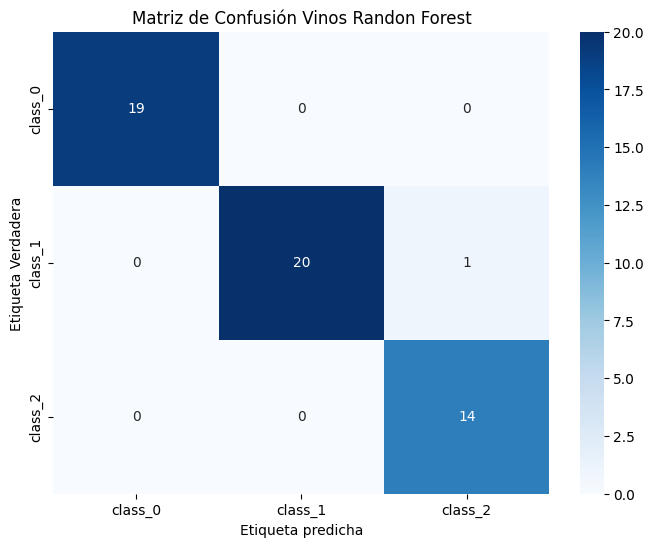

In [70]:
# Primero, mostramos un reporte con varias métricas sobre la clasificación
print("\nClasification Report Randon Forest:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Creamos la matriz de confusión, que nos dice cuántos aciertos y errores tuvimos
cm = confusion_matrix(y_test, y_pred)

# Esta función dibuja la matriz de confusión para que sea más fácil de ver
plot_confusion_matrix(cm, wine.target_names, "Matriz de Confusión Vinos Randon Forest")

In [51]:
# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)


Clasification Report KNN:
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



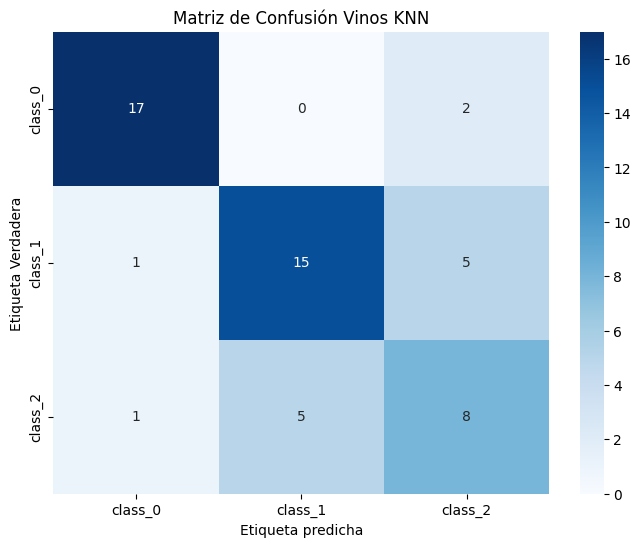

In [52]:
# Primero, mostramos un reporte con varias métricas sobre la clasificación
print("\nClasification Report KNN:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Creamos la matriz de confusión, que nos dice cuántos aciertos y errores tuvimos
cm = confusion_matrix(y_test, y_pred)

# Esta función dibuja la matriz de confusión para que sea más fácil de ver
plot_confusion_matrix(cm, wine.target_names, "Matriz de Confusión Vinos KNN")

In [56]:


# Crear el modelo de Regresión Logística con hiperparámetros específicos
model = LogisticRegression(penalty ='l2',           # Tipo de regularización L2 (Ridge)
C=1.0,                   # Inverso de la fuerza de regularización
solver='lbfgs',          # Algoritmo para la optimización
max_iter=100,            # Número máximo de iteraciones
tol=1e-4,                # Tolerancia para el criterio de parada
random_state=42)         # Semilla para la reproducibilidad

# Entrenar el modelo
model.fit(X_train, y_train)

c:\Users\edgar\miniforge3\envs\machine_learning_ds02\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [63]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)  # Probabilidades de la clase positiva


Exactitud: 0.9814814814814815
Informe de Clasificación Regresión Logística:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Matriz de Confusión:


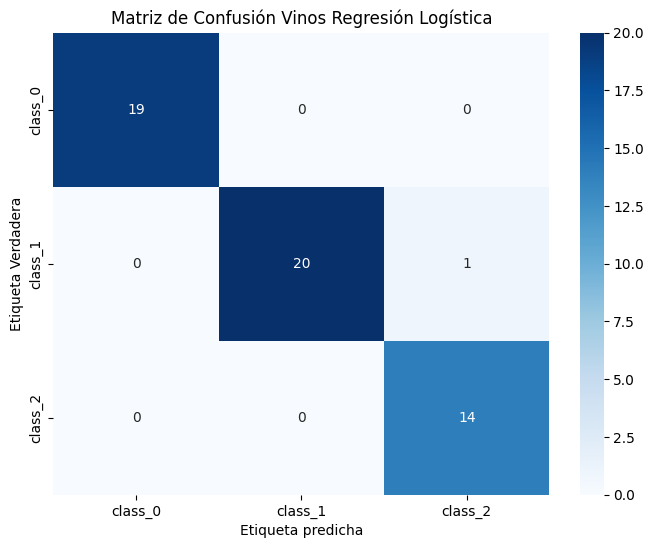

In [72]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación Regresión Logística:')
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
# Esta función dibuja la matriz de confusión para que sea más fácil de ver
plot_confusion_matrix(cm, wine.target_names, "Matriz de Confusión Vinos Regresión Logística")



Random Fores y Regresión Logística son los mejores modelos. Mismas metricas para Precision, Recall y F1-Score
Ambos son modelos basados en aprendizaje. Aprende una representación de datos y extraen patrones para realizar las predicciones.

KNN sinembargo No tiene un proceso de entrenamiento real, sino que simplemente almacena los datos y, durante la predicción, compara la nueva observación con los ejemplos de entrenamiento, calculando las distancias

In [75]:
# Convertir a DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Agregar la columna de la etiqueta (target)
df['target'] = wine.target

# Ver el DataFrame
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [76]:
df['target'].unique()

array([0, 1, 2])